In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

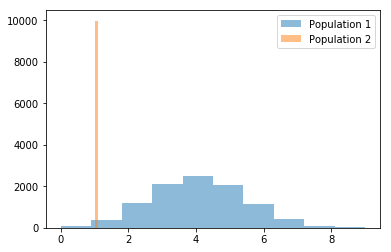

In [98]:
pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.zipf(10, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

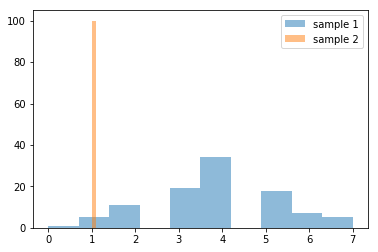

In [100]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [95]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

3.82
4.62
1.6454786537661312
1.7480274597385477
0.8000000000000003


In [101]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

5.477525135398832


In [103]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=-19.5521214474653, pvalue=9.055935784916723e-36)


In [104]:
# 1. Diff between 1000 samples & 20 samples - The mean changes a little for each.  1000 samples is far closer to the p.
# std() changes more for each creating more variance between the 2 samples with 20 than 1000.

# 2. With p=0.3 and then p=0.4, the t-value decreased while the p-value increased.  The reason the t-value decreases is because
# the standard error between pop1 and pop2 becomes smaller and would indicate the 2 populations became more similar.  The p-value increasing
# indicates less of a difference between pop1 & pop2

# 3. CLT states that sample means will always represent the true population mean provided that the sample size is big enough.  The more non-normal
# the data is distributed, the greater the sample size needed.  But the statistics can still be calcuated and estimated.